In [2]:
import pandas as pd
import yfinance as yf

# Download historical stock data
stock_data = yf.download("AAPL", start="2010-01-01", end="2023-01-01")
stock_data.to_csv("AAPL_stock_data.csv")

[*********************100%%**********************]  1 of 1 completed


In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the data
data = pd.read_csv("AAPL_stock_data.csv")

# Handle missing values
data.fillna(method='ffill', inplace=True)

# Feature selection
data = data[['Close']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create input-output pairs
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60
X, Y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)


C:\Users\samsd\AppData\Local\Temp\ipykernel_6816\1067730667.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [4]:
data.describe

<bound method NDFrame.describe of            Close
0       7.643214
1       7.656429
2       7.534643
3       7.520714
4       7.570714
...          ...
3267  131.860001
3268  130.029999
3269  126.040001
3270  129.610001
3271  129.929993

[3272 rows x 1 columns]>

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, Y, batch_size=1, epochs=1)


c:\Users\samsd\anaconda3\envs\workspace\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3211/3211 ━━━━━━━━━━━━━━━━━━━━ 53s 15ms/step - loss: 0.0017


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


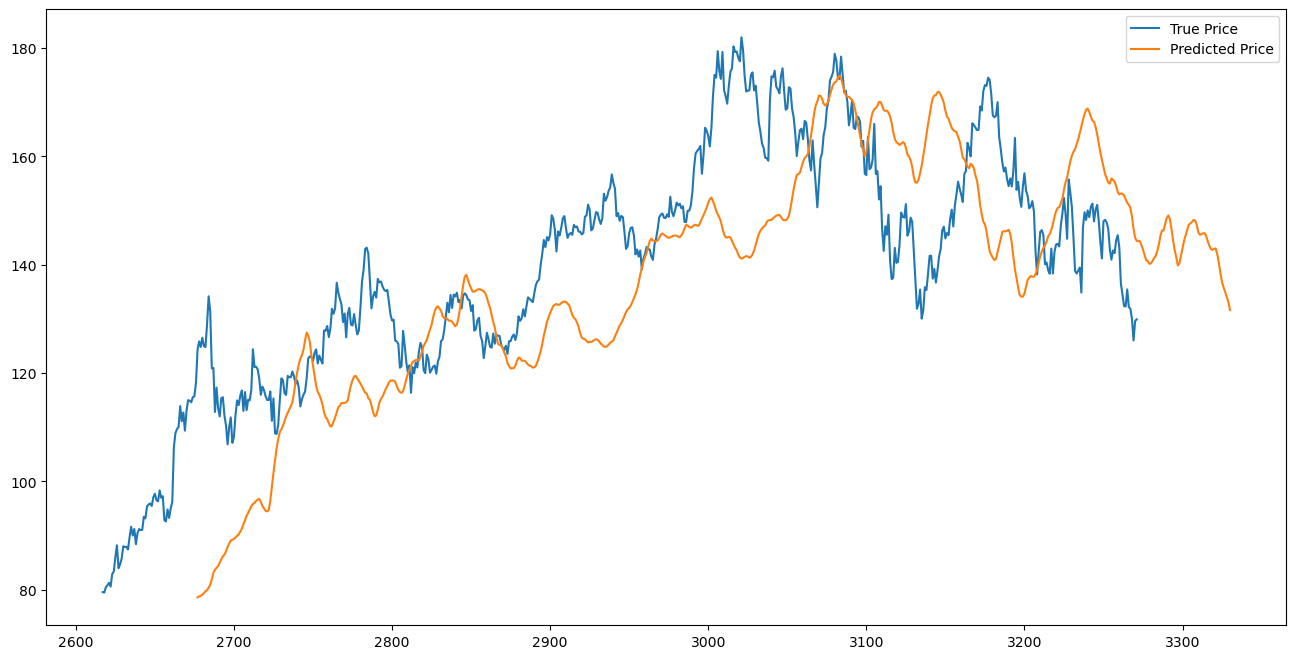

In [6]:
import matplotlib.pyplot as plt

# Split data into training and testing sets
training_size = int(len(scaled_data) * 0.8)
test_data = scaled_data[training_size - time_step:]

# Create the test dataset
X_test, Y_test = create_dataset(test_data, time_step)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Plot the results
plt.figure(figsize=(16, 8))
plt.plot(data['Close'][training_size:], label='True Price')

# Ensure the x-axis and y-axis data have the same length
x_axis = range(training_size + time_step, training_size + time_step + len(predictions))
plt.plot(x_axis, predictions, label='Predicted Price')

plt.legend()
plt.show()


In [7]:
# Save the trained model
model.save('model/lstm_model.h5')